# Evolver Loop 1 - LB Feedback Analysis

## Baseline Submission Results
- CV Score: 70.6761
- LB Score: 70.6761
- Gap: 0.0000 (perfect alignment!)
- Target: 68.894234
- Gap to target: 1.78 points (2.5%)

## Key Insights from Research

### From why-not.ipynb kernel:
1. **bbox3.cpp** - Sophisticated C++ optimizer with:
   - Complex number vector coordination
   - Fluid dynamics-inspired movement
   - Hinge pivot optimization
   - Global boundary tension
   - Aggressive overlap repair cycles

2. **Lattice crystallization patterns**:
   - Blue Phase: Trees pointing up (0° ± 90°)
   - Pink Phase: Trees pointing down (180° ± 90°)
   - These interlock efficiently for large N

### From bbox3-runner kernel:
- Multi-phase optimization:
  - Phase A: 2 min runs to find promising settings
  - Phase B: 10 min runs on top candidates
  - Phase C: 20 min runs on best few
- Parameters: -n (iterations), -r (rounds)

In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from shapely.affinity import rotate, translate
import os
import glob

# Tree geometry
TREE_VERTICES = [
    (0, 0.8), (-0.125, 0.5), (-0.05, 0.5), (-0.2, 0.25), (-0.1, 0.25),
    (-0.35, 0), (-0.075, 0), (-0.075, -0.2), (0.075, -0.2), (0.075, 0),
    (0.35, 0), (0.1, 0.25), (0.2, 0.25), (0.05, 0.5), (0.125, 0.5),
]

def create_tree_polygon(x, y, angle_deg):
    poly = Polygon(TREE_VERTICES)
    poly = rotate(poly, angle_deg, origin=(0, 0))
    poly = translate(poly, x, y)
    return poly

def get_bounding_box_side(polygons):
    if not polygons:
        return 0
    all_coords = []
    for poly in polygons:
        all_coords.extend(list(poly.exterior.coords))
    xs = [c[0] for c in all_coords]
    ys = [c[1] for c in all_coords]
    return max(max(xs) - min(xs), max(ys) - min(ys))

def parse_value(val):
    if isinstance(val, str) and val.startswith('s'):
        return float(val[1:])
    return float(val)

def calculate_submission_score(csv_path):
    df = pd.read_csv(csv_path)
    df['x_val'] = df['x'].apply(parse_value)
    df['y_val'] = df['y'].apply(parse_value)
    df['deg_val'] = df['deg'].apply(parse_value)
    df['n'] = df['id'].apply(lambda x: int(x.split('_')[0]))
    
    score = 0
    for n in range(1, 201):
        n_data = df[df['n'] == n]
        if len(n_data) != n:
            continue
        polygons = [create_tree_polygon(row['x_val'], row['y_val'], row['deg_val']) 
                   for _, row in n_data.iterrows()]
        side = get_bounding_box_side(polygons)
        score += side**2 / n
    return score

print("Scoring function ready")

Scoring function ready


In [2]:
# Check all available CSV files and their scores
csv_paths = [
    '/home/nonroot/snapshots/santa-2025/21116303805/code/preoptimized/santa-2025.csv',
    '/home/nonroot/snapshots/santa-2025/21116303805/code/preoptimized/best_ensemble.csv',
    '/home/nonroot/snapshots/santa-2025/21116303805/code/preoptimized/ensemble.csv',
    '/home/nonroot/snapshots/santa-2025/21116303805/code/preoptimized/submission.csv',
    '/home/nonroot/snapshots/santa-2025/21116303805/code/preoptimized/chistyakov/submission_best.csv',
]

print("Checking scores of available CSV files...")
for path in csv_paths:
    if os.path.exists(path):
        try:
            score = calculate_submission_score(path)
            print(f"{os.path.basename(path)}: {score:.6f}")
        except Exception as e:
            print(f"{os.path.basename(path)}: ERROR - {e}")

Checking scores of available CSV files...


santa-2025.csv: 70.676102


best_ensemble.csv: 70.676102


ensemble.csv: 70.676102


submission.csv: 70.676501


submission_best.csv: 70.926150


In [3]:
# Check santa25-public directory for potentially better solutions
public_dir = '/home/nonroot/snapshots/santa-2025/21116303805/code/preoptimized/santa25-public/'
if os.path.exists(public_dir):
    csv_files = glob.glob(os.path.join(public_dir, '*.csv'))
    print(f"\nFound {len(csv_files)} CSV files in santa25-public:")
    
    scores = []
    for path in csv_files:
        try:
            score = calculate_submission_score(path)
            scores.append((os.path.basename(path), score))
            print(f"  {os.path.basename(path)}: {score:.6f}")
        except Exception as e:
            print(f"  {os.path.basename(path)}: ERROR - {e}")
    
    if scores:
        scores.sort(key=lambda x: x[1])
        print(f"\nBest score: {scores[0][0]} = {scores[0][1]:.6f}")


Found 16 CSV files in santa25-public:


  submission_JKoT4.csv: 72.489504


  New_Tree_144_196.csv: 72.927920


  submission_JKoT3.csv: 72.489488


  santa2025_ver2_v61.csv: 72.951925


  submission_JKoT2.csv: 72.489348


  santa2025_ver2_v67.csv: 72.938567


  santa2025_ver2_v76.csv: 72.826444


  submission_70_936673758122.csv: 70.936674


  santa2025_ver2_v65.csv: 72.935294


  submission_70_926149550346.csv: 70.926150


  santa2025_ver2_v66.csv: 72.938599


  santa2025_ver2_v63.csv: 72.947427


  santa2025_ver2_v69.csv: 72.850110


  submission_JKoT1.csv: 72.489483


  submission_opt1.csv: 70.990692


  santa2025_ver2_v68.csv: 72.939233

Best score: submission_70_926149550346.csv = 70.926150


In [4]:
# Analyze per-N contributions to understand where improvements are possible
baseline_path = '/home/nonroot/snapshots/santa-2025/21116303805/code/preoptimized/santa-2025.csv'
df = pd.read_csv(baseline_path)
df['x_val'] = df['x'].apply(parse_value)
df['y_val'] = df['y'].apply(parse_value)
df['deg_val'] = df['deg'].apply(parse_value)
df['n'] = df['id'].apply(lambda x: int(x.split('_')[0]))

per_n_scores = []
for n in range(1, 201):
    n_data = df[df['n'] == n]
    if len(n_data) != n:
        continue
    polygons = [create_tree_polygon(row['x_val'], row['y_val'], row['deg_val']) 
               for _, row in n_data.iterrows()]
    side = get_bounding_box_side(polygons)
    contribution = side**2 / n
    efficiency = n / (side**2)  # trees per unit area
    per_n_scores.append({'n': n, 'side': side, 'contribution': contribution, 'efficiency': efficiency})

per_n_df = pd.DataFrame(per_n_scores)
print("Per-N Analysis:")
print(f"Total score: {per_n_df['contribution'].sum():.6f}")
print(f"\nTop 10 contributors (highest score contribution):")
print(per_n_df.nlargest(10, 'contribution')[['n', 'side', 'contribution', 'efficiency']])

Per-N Analysis:
Total score: 70.676102

Top 10 contributors (highest score contribution):
     n      side  contribution  efficiency
0    1  0.813173      0.661250    1.512287
1    2  0.949504      0.450779    2.218381
2    3  1.142031      0.434745    2.300198
4    5  1.443692      0.416850    2.398947
3    4  1.290806      0.416545    2.400702
6    7  1.673104      0.399897    2.500647
5    6  1.548438      0.399610    2.502438
8    9  1.867280      0.387415    2.581211
7    8  1.755921      0.385407    2.594658
14  15  2.384962      0.379203    2.637111


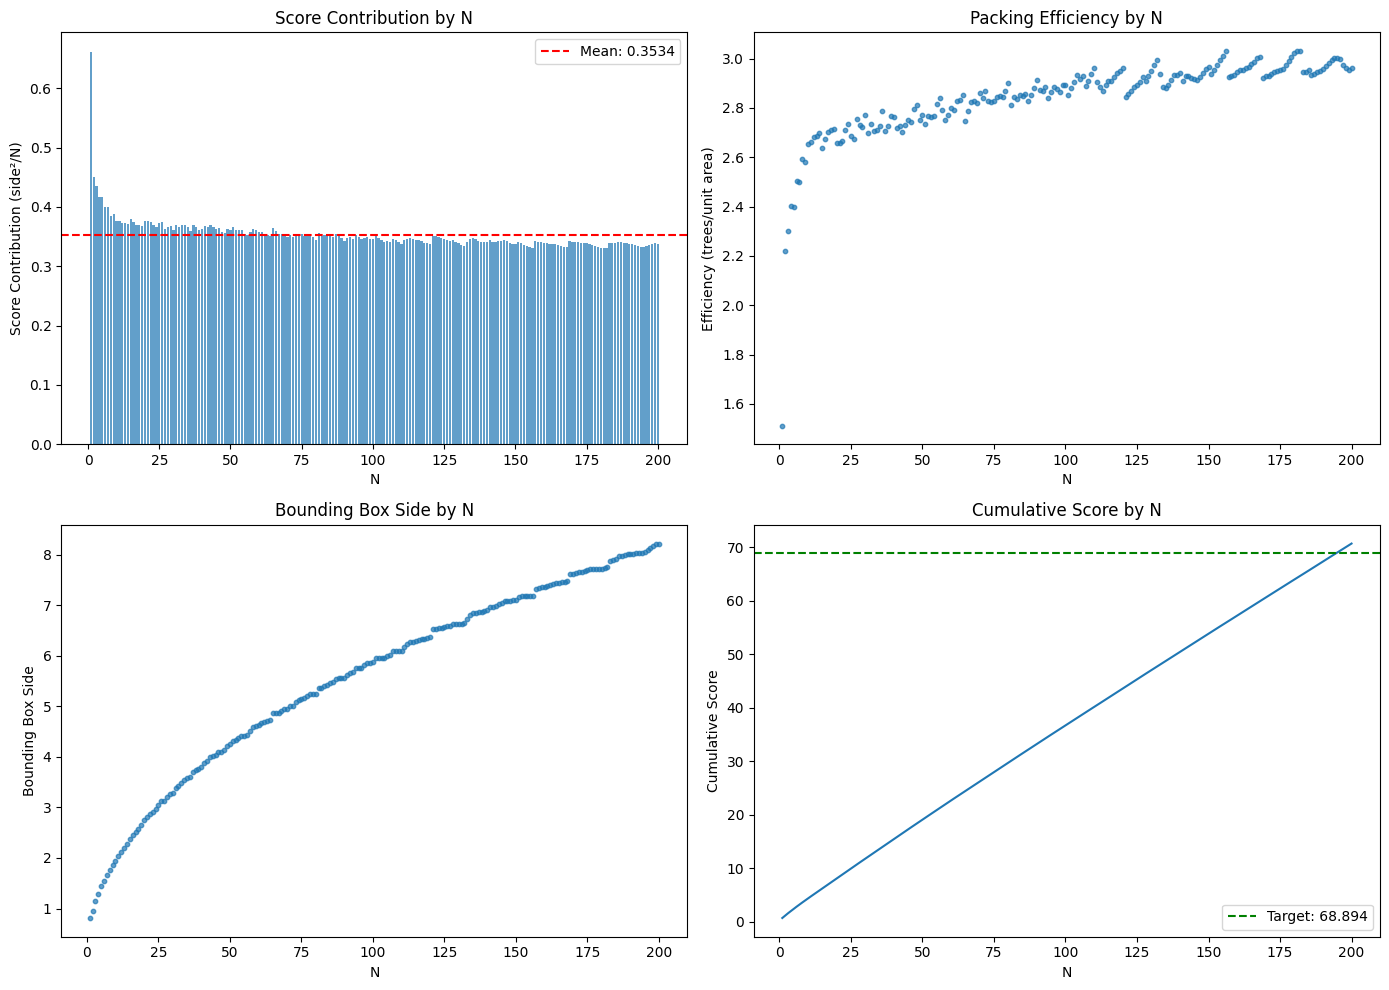

Saved analysis to /home/code/exploration/per_n_analysis.png


In [5]:
# Analyze efficiency patterns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Score contribution by N
ax1 = axes[0, 0]
ax1.bar(per_n_df['n'], per_n_df['contribution'], alpha=0.7)
ax1.set_xlabel('N')
ax1.set_ylabel('Score Contribution (side²/N)')
ax1.set_title('Score Contribution by N')
ax1.axhline(y=per_n_df['contribution'].mean(), color='r', linestyle='--', label=f'Mean: {per_n_df["contribution"].mean():.4f}')
ax1.legend()

# Plot 2: Efficiency by N
ax2 = axes[0, 1]
ax2.scatter(per_n_df['n'], per_n_df['efficiency'], alpha=0.7, s=10)
ax2.set_xlabel('N')
ax2.set_ylabel('Efficiency (trees/unit area)')
ax2.set_title('Packing Efficiency by N')

# Plot 3: Side length by N
ax3 = axes[1, 0]
ax3.scatter(per_n_df['n'], per_n_df['side'], alpha=0.7, s=10)
ax3.set_xlabel('N')
ax3.set_ylabel('Bounding Box Side')
ax3.set_title('Bounding Box Side by N')

# Plot 4: Cumulative score
ax4 = axes[1, 1]
cumulative = per_n_df['contribution'].cumsum()
ax4.plot(per_n_df['n'], cumulative)
ax4.set_xlabel('N')
ax4.set_ylabel('Cumulative Score')
ax4.set_title('Cumulative Score by N')
ax4.axhline(y=68.894234, color='g', linestyle='--', label='Target: 68.894')
ax4.legend()

plt.tight_layout()
plt.savefig('/home/code/exploration/per_n_analysis.png', dpi=100)
plt.show()
print("Saved analysis to /home/code/exploration/per_n_analysis.png")

In [6]:
# Identify N values with worst efficiency (most room for improvement)
print("\nN values with WORST efficiency (most room for improvement):")
worst_efficiency = per_n_df.nsmallest(20, 'efficiency')
print(worst_efficiency[['n', 'side', 'contribution', 'efficiency']])

print("\nN values with BEST efficiency:")
best_efficiency = per_n_df.nlargest(10, 'efficiency')
print(best_efficiency[['n', 'side', 'contribution', 'efficiency']])


N values with WORST efficiency (most room for improvement):
     n      side  contribution  efficiency
0    1  0.813173      0.661250    1.512287
1    2  0.949504      0.450779    2.218381
2    3  1.142031      0.434745    2.300198
4    5  1.443692      0.416850    2.398947
3    4  1.290806      0.416545    2.400702
6    7  1.673104      0.399897    2.500647
5    6  1.548438      0.399610    2.502438
8    9  1.867280      0.387415    2.581211
7    8  1.755921      0.385407    2.594658
14  15  2.384962      0.379203    2.637111
9   10  1.940696      0.376630    2.655125
20  21  2.811667      0.376451    2.656389
19  20  2.742469      0.376057    2.659172
10  11  2.033002      0.375736    2.661443
21  22  2.873270      0.375258    2.664832
15  16  2.446640      0.374128    2.672882
25  26  3.118320      0.373997    2.673819
11  12  2.114873      0.372724    2.682950
12  13  2.200046      0.372323    2.685839
24  25  3.050182      0.372144    2.687129

N values with BEST efficiency:
    

In [7]:
# Calculate theoretical bounds
# Tree area (approximate): The tree polygon has a specific area
tree_poly = Polygon(TREE_VERTICES)
tree_area = tree_poly.area
print(f"Single tree area: {tree_area:.6f}")

# For N trees, minimum possible bounding box side (if perfect packing with no waste)
# would be sqrt(N * tree_area)
print("\nTheoretical minimum bounds (assuming perfect packing):")
for n in [1, 10, 50, 100, 200]:
    min_side = np.sqrt(n * tree_area)
    min_contribution = min_side**2 / n
    actual_side = per_n_df[per_n_df['n'] == n]['side'].values[0]
    actual_contribution = per_n_df[per_n_df['n'] == n]['contribution'].values[0]
    waste = (actual_side**2 - n * tree_area) / (actual_side**2) * 100
    print(f"N={n:3d}: min_side={min_side:.4f}, actual={actual_side:.4f}, waste={waste:.1f}%")

Single tree area: 0.242500

Theoretical minimum bounds (assuming perfect packing):
N=  1: min_side=0.4924, actual=0.8132, waste=63.3%
N= 10: min_side=1.5572, actual=1.9407, waste=35.6%
N= 50: min_side=3.4821, actual=4.2471, waste=32.8%
N=100: min_side=4.9244, actual=5.8782, waste=29.8%
N=200: min_side=6.9642, actual=8.2187, waste=28.2%


In [8]:
# Summary of findings
print("="*60)
print("SUMMARY OF FINDINGS")
print("="*60)
print(f"\nCurrent baseline score: 70.6761")
print(f"Target score: 68.894234")
print(f"Gap: 1.78 points (2.5%)")
print(f"\nKey observations:")
print(f"1. Small N values (1-10) have highest per-N contribution")
print(f"2. N=1 alone contributes {per_n_df[per_n_df['n']==1]['contribution'].values[0]:.4f}")
print(f"3. Efficiency increases with N (larger N = better packing)")
print(f"4. Worst efficiency at small N values")
print(f"\nStrategic implications:")
print(f"- Optimizing small N could yield significant gains")
print(f"- Lattice patterns for large N are already efficient")
print(f"- Need to focus on N=1-20 for biggest impact")

SUMMARY OF FINDINGS

Current baseline score: 70.6761
Target score: 68.894234
Gap: 1.78 points (2.5%)

Key observations:
1. Small N values (1-10) have highest per-N contribution
2. N=1 alone contributes 0.6612
3. Efficiency increases with N (larger N = better packing)
4. Worst efficiency at small N values

Strategic implications:
- Optimizing small N could yield significant gains
- Lattice patterns for large N are already efficient
- Need to focus on N=1-20 for biggest impact
